In [1]:
%load_ext watermark

In [2]:
import time
from pathlib import Path

import geowombat as gw
from geowombat.moving import moving_window
# from geowombat.moving._moving_test1 import moving_window as moving_test1
# from geowombat.moving._moving_test2 import moving_window as moving_test2
from geowombat.core import sort_images_by_date

import numpy as np
import matplotlib.pyplot as plt

In [3]:
%watermark -d -v -m -p geowombat,rasterio -g

2020-03-31 

CPython 3.7.5
IPython 7.13.0

geowombat 1.2.7
rasterio 1.1.3

compiler   : GCC 8.3.0
system     : Linux
release    : 4.15.0-91-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
Git hash   : 5f12858d69f36dd4c9270f6c6638af5f7c0a2521


In [4]:
path = Path('/media/jcgr/data/projects/global_fields/data/grids/ms/000960/brdf')

In [5]:
image_dict = sort_images_by_date(path, '*.tif', 3, 0, 8)

In [6]:
image_list = list(image_dict.keys())
time_list = list(image_dict.values())

In [7]:
image_names, time_names = [], []

for fn, tn in zip(image_list, time_list):
    if 'angles' not in fn:
        image_names.append(fn)
        time_names.append(tn)

In [8]:
image_names[:5]

['/media/jcgr/data/projects/global_fields/data/grids/ms/000960/brdf/LE07_L1TP_225078_20170101_20170127_01_T1.tif',
 '/media/jcgr/data/projects/global_fields/data/grids/ms/000960/brdf/LE07_L1TP_225078_20170101_20170222_01_T1.tif',
 '/media/jcgr/data/projects/global_fields/data/grids/ms/000960/brdf/LC08_L1TP_224078_20170102_20170312_01_T1.tif',
 '/media/jcgr/data/projects/global_fields/data/grids/ms/000960/brdf/L1C_T21JXM_A008029_20170104T135054_MTD.tif',
 '/media/jcgr/data/projects/global_fields/data/grids/ms/000960/brdf/LC08_L1TP_225078_20170109_20170311_01_T1.tif']

---

In [9]:
# with gw.config.update(sensor='l7'):

#     with gw.open(image_names,
#                  time_names=time_names) as src:
        
#         print(src)

In [10]:
with gw.config.update(sensor='l7'):

    with gw.open(image_names[70]) as src:
        
        array = (src.sel(band='nir').astype('float64')*0.0001).clip(0, 1).data.compute()

In [ ]:
psamples_data = []
prows_data = []
norm_data = []

In [ ]:
windows = [5, 15, 25, 51]

In [ ]:
for w in windows:

    start_time = time.time()

    out = moving_window(array, 'perc', w=w, nodata=0, perc=50, n_jobs=8)

    end_time = time.time() - start_time
    
    psamples_data.append(end_time)

In [ ]:
# for w in windows:

#     start_time = time.time()

#     out = moving_test1(array, 'perc', w=w, nodata=0, perc=50, n_jobs=8)

#     end_time = time.time() - start_time
    
#     prows_data.append(end_time)

In [ ]:
# for w in windows:

#     start_time = time.time()

#     out = moving_test2(array, 'var', w=w, nodata=0, perc=50)

#     end_time = time.time() - start_time
    
#     norm_data.append(end_time)

In [11]:
plt.plot(windows, psamples_data, label='Parallel over samples')
# plt.plot(windows, prows_data, label='Parallel over rows')
# plt.plot(windows, norm_data, label='Normal moving window')

plt.legend()

NameError: name 'windows' is not defined

In [61]:
%%time
    
w = 31
wh = int(w / 2)    
    
out = moving_window(array, 'perc', w=w, nodata=0, perc=75, weights=False, n_jobs=8)

CPU times: user 1min 26s, sys: 16.8 ms, total: 1min 26s
Wall time: 11 s


In [62]:
# %%time
    
# out = moving_test1(array, 'mean', w=w, nodata=0, perc=50, weights=True, n_jobs=8)

In [63]:
# %%time

# out = moving_test2(array, 'mean', w=w, nodata=0, perc=50, weights=True)

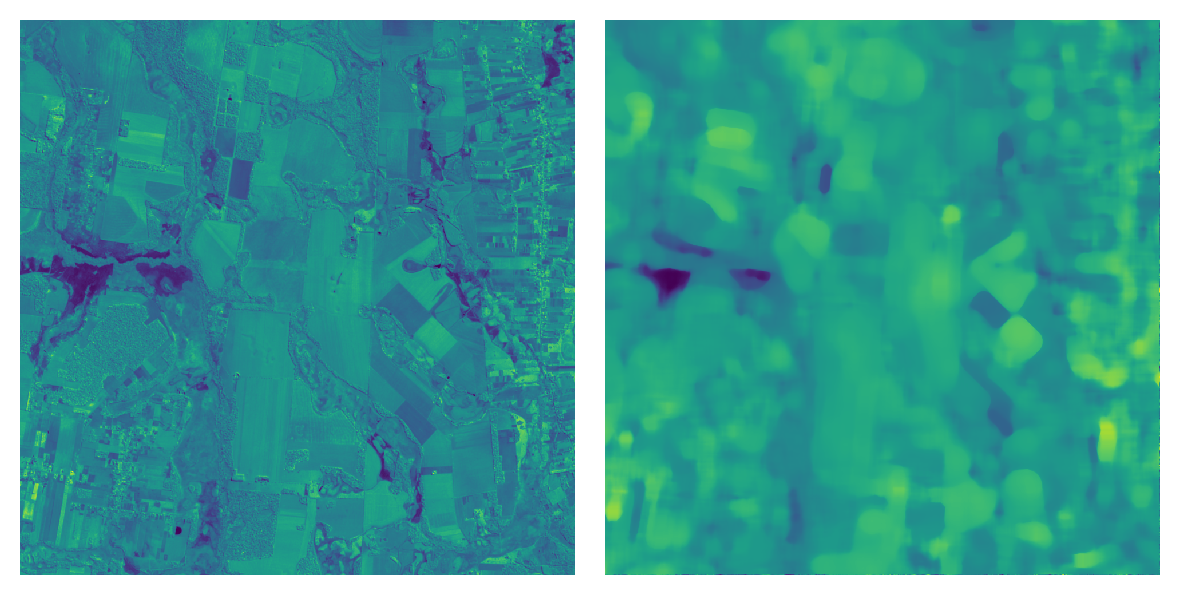

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=200)

ax1.imshow(array[wh:-wh, wh:-wh], interpolation='nearest')
ax1.axis('off')
ax2.imshow(out[wh:-wh, wh:-wh], interpolation='nearest')
ax2.axis('off')

plt.tight_layout()

In [16]:
w = 15
wh = int(w / 2)

with gw.open(rgbn, chunks=512) as src:

    src.attrs['apply'] = moving_window
    src.attrs['apply_kwargs'] = {'stat': 'mean', 'w': w, 'n_jobs': 4, 'nodata': 0}

    res.gw.to_raster('output.tif',
                     n_workers=4,
                     n_threads=1,
                     padding=(wh, wh, wh, wh))

NameError: name 'rgbn' is not defined